In [54]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import itertools
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

# File to Load 
crime_data_to_load = Path("C:/Users/jackb\Downloads/Crime_Data_from_2020_to_Present.csv")
crime_data=pd.read_csv(crime_data_to_load)

In [55]:
crime_data.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [56]:
#Dropping columns we will not use
crime=crime_data.drop(['DR_NO','AREA','Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3','Cross Street','Crm Cd','Weapon Used Cd','Rpt Dist No','Part 1-2', 'Crm Cd 4', 'Mocodes', 'Date Rptd',
         'Premis Cd', 'Status', 'Status Desc'], axis=1)
crime

,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,LOCATION,LAT,LON
0,01/08/2020 12:00:00 AM,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,34.0141,-118.2978
1,01/01/2020 12:00:00 AM,330,Central,BATTERY - SIMPLE ASSAULT,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,34.0459,-118.2545
2,02/13/2020 12:00:00 AM,1200,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,POLICE FACILITY,NaN,200 E 6TH ST,34.0448,-118.2474
3,01/01/2020 12:00:00 AM,1730,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,5400 CORTEEN PL,34.1685,-118.4019
4,01/01/2020 12:00:00 AM,415,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,BEAUTY SUPPLY STORE,NaN,14400 TITUS ST,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...
834315,01/26/2023 12:00:00 AM,1800,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,"VEHICLE, PASSENGER/TRUCK",NaN,12500 BRANFORD ST,34.2466,-118.4054
834316,03/22/2023 12:00:00 AM,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",12800 FILMORE ST,34.2790,-118.4116
834317,04/12/2023 12:00:00 AM,1630,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,LAUNDROMAT,UNKNOWN WEAPON/OTHER WEAPON,6100 S VERMONT AV,33.9841,-118.2915
834318,07/01/2023 12:00:00 AM,1,Central,PICKPOCKET,24,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),NaN,500 S MAIN ST,34.0467,-118.2485


In [57]:
#Rename the columns
clean_crime_data = crime.rename(columns={
    "DATE OCC": "Date of Crime",
    "TIME OCC": "Time of Crime",
    "AREA NAME": "Neighborhood",
    "Crm Cd Desc": "Type of Crime",
    "Vict Age": "Age",
    "Vict Sex": "Gender",
    "Vict Descent": "Ethnicity",
    "Premis Desc": "Location",
    "Weapon Desc": "Weapon Used",
    "LOCATION": "Address",
    "LAT": "Latitude",
    "LON": "Longitude"
})
clean_crime_data

,Date of Crime,Time of Crime,Neighborhood,Type of Crime,Age,Gender,Ethnicity,Location,Weapon Used,Address,Latitude,Longitude
0,01/08/2020 12:00:00 AM,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,34.0141,-118.2978
1,01/01/2020 12:00:00 AM,330,Central,BATTERY - SIMPLE ASSAULT,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,34.0459,-118.2545
2,02/13/2020 12:00:00 AM,1200,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,POLICE FACILITY,NaN,200 E 6TH ST,34.0448,-118.2474
3,01/01/2020 12:00:00 AM,1730,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,5400 CORTEEN PL,34.1685,-118.4019
4,01/01/2020 12:00:00 AM,415,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,BEAUTY SUPPLY STORE,NaN,14400 TITUS ST,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...
834315,01/26/2023 12:00:00 AM,1800,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,"VEHICLE, PASSENGER/TRUCK",NaN,12500 BRANFORD ST,34.2466,-118.4054
834316,03/22/2023 12:00:00 AM,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",12800 FILMORE ST,34.2790,-118.4116
834317,04/12/2023 12:00:00 AM,1630,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,LAUNDROMAT,UNKNOWN WEAPON/OTHER WEAPON,6100 S VERMONT AV,33.9841,-118.2915
834318,07/01/2023 12:00:00 AM,1,Central,PICKPOCKET,24,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),NaN,500 S MAIN ST,34.0467,-118.2485


In [58]:
#Data after dropping the Nan in "Weapon Desc"
clean_crime_data = clean_crime_data.dropna(subset=['Weapon Used'])
clean_crime_data

,Date of Crime,Time of Crime,Neighborhood,Type of Crime,Age,Gender,Ethnicity,Location,Weapon Used,Address,Latitude,Longitude
0,01/08/2020 12:00:00 AM,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,34.0141,-118.2978
1,01/01/2020 12:00:00 AM,330,Central,BATTERY - SIMPLE ASSAULT,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,34.0459,-118.2545
5,01/01/2020 12:00:00 AM,30,Central,"RAPE, FORCIBLE",25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,700 S BROADWAY,34.0452,-118.2534
10,01/04/2020 12:00:00 AM,2200,Central,BURGLARY FROM VEHICLE,29,M,A,STREET,ROCK/THROWN OBJECT,15TH,34.0359,-118.2648
11,01/05/2020 12:00:00 AM,955,Central,CRIMINAL THREATS - NO WEAPON DISPLAYED,35,M,O,PARKING LOT,VERBAL THREAT,800 N ALAMEDA ST,34.0615,-118.2412
...,...,...,...,...,...,...,...,...,...,...,...,...
834303,08/27/2023 12:00:00 AM,30,N Hollywood,BRANDISH WEAPON,38,M,H,STREET,KNIFE WITH BLADE 6INCHES OR LESS,11000 MCCORMICK ST,34.1660,-118.3705
834306,07/24/2023 12:00:00 AM,1400,Hollywood,ROBBERY,23,F,B,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",5500 HOLLYWOOD BL,34.1038,-118.3151
834309,09/20/2023 12:00:00 AM,1915,Van Nuys,BATTERY - SIMPLE ASSAULT,44,M,B,LIBRARY,UNKNOWN WEAPON/OTHER WEAPON,6200 SYLMAR AV,34.1837,-118.4465
834316,03/22/2023 12:00:00 AM,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",12800 FILMORE ST,34.2790,-118.4116


In [59]:
#Again renaming the Ethnicity column in to meaningful 'H'- Hispanic, 'B'-Black,'W'-White,'O'-Others,'A'-Other Asians
clean_crime_data['Ethnicity'] = clean_crime_data['Ethnicity'].replace({
    'H': 'Hispanic',
    'B': 'Black',
    'W':'White',
    'O':'Others',
    'A':'Other Asians'})
clean_crime_data

,Date of Crime,Time of Crime,Neighborhood,Type of Crime,Age,Gender,Ethnicity,Location,Weapon Used,Address,Latitude,Longitude
0,01/08/2020 12:00:00 AM,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,Black,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,34.0141,-118.2978
1,01/01/2020 12:00:00 AM,330,Central,BATTERY - SIMPLE ASSAULT,25,M,Hispanic,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,34.0459,-118.2545
5,01/01/2020 12:00:00 AM,30,Central,"RAPE, FORCIBLE",25,F,Hispanic,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,700 S BROADWAY,34.0452,-118.2534
10,01/04/2020 12:00:00 AM,2200,Central,BURGLARY FROM VEHICLE,29,M,Other Asians,STREET,ROCK/THROWN OBJECT,15TH,34.0359,-118.2648
11,01/05/2020 12:00:00 AM,955,Central,CRIMINAL THREATS - NO WEAPON DISPLAYED,35,M,Others,PARKING LOT,VERBAL THREAT,800 N ALAMEDA ST,34.0615,-118.2412
...,...,...,...,...,...,...,...,...,...,...,...,...
834303,08/27/2023 12:00:00 AM,30,N Hollywood,BRANDISH WEAPON,38,M,Hispanic,STREET,KNIFE WITH BLADE 6INCHES OR LESS,11000 MCCORMICK ST,34.1660,-118.3705
834306,07/24/2023 12:00:00 AM,1400,Hollywood,ROBBERY,23,F,Black,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",5500 HOLLYWOOD BL,34.1038,-118.3151
834309,09/20/2023 12:00:00 AM,1915,Van Nuys,BATTERY - SIMPLE ASSAULT,44,M,Black,LIBRARY,UNKNOWN WEAPON/OTHER WEAPON,6200 SYLMAR AV,34.1837,-118.4465
834316,03/22/2023 12:00:00 AM,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,Hispanic,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",12800 FILMORE ST,34.2790,-118.4116


In [60]:
#Change Date and Time
from datetime import datetime, timedelta
clean_crime_data['Time of Crime'] = clean_crime_data['Time of Crime'].apply(lambda x: datetime.strptime(str(x).zfill(4), '%H%M').time())

clean_crime_data['Date of Crime'] = pd.to_datetime(clean_crime_data['Date of Crime']).dt.date

In [61]:
clean_crime_data

,Date of Crime,Time of Crime,Neighborhood,Type of Crime,Age,Gender,Ethnicity,Location,Weapon Used,Address,Latitude,Longitude
0,2020-01-08,22:30:00,Southwest,BATTERY - SIMPLE ASSAULT,36,F,Black,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,34.0141,-118.2978
1,2020-01-01,03:30:00,Central,BATTERY - SIMPLE ASSAULT,25,M,Hispanic,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,34.0459,-118.2545
5,2020-01-01,00:30:00,Central,"RAPE, FORCIBLE",25,F,Hispanic,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,700 S BROADWAY,34.0452,-118.2534
10,2020-01-04,22:00:00,Central,BURGLARY FROM VEHICLE,29,M,Other Asians,STREET,ROCK/THROWN OBJECT,15TH,34.0359,-118.2648
11,2020-01-05,09:55:00,Central,CRIMINAL THREATS - NO WEAPON DISPLAYED,35,M,Others,PARKING LOT,VERBAL THREAT,800 N ALAMEDA ST,34.0615,-118.2412
...,...,...,...,...,...,...,...,...,...,...,...,...
834303,2023-08-27,00:30:00,N Hollywood,BRANDISH WEAPON,38,M,Hispanic,STREET,KNIFE WITH BLADE 6INCHES OR LESS,11000 MCCORMICK ST,34.1660,-118.3705
834306,2023-07-24,14:00:00,Hollywood,ROBBERY,23,F,Black,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",5500 HOLLYWOOD BL,34.1038,-118.3151
834309,2023-09-20,19:15:00,Van Nuys,BATTERY - SIMPLE ASSAULT,44,M,Black,LIBRARY,UNKNOWN WEAPON/OTHER WEAPON,6200 SYLMAR AV,34.1837,-118.4465
834316,2023-03-22,10:00:00,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,Hispanic,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",12800 FILMORE ST,34.2790,-118.4116


In [62]:
#changing x and h in gender colum to other.
clean_crime_data['Gender'] = clean_crime_data['Gender'].replace({
    'H': 'Other',
    'X': 'Other'})
clean_crime_data

,Date of Crime,Time of Crime,Neighborhood,Type of Crime,Age,Gender,Ethnicity,Location,Weapon Used,Address,Latitude,Longitude
0,2020-01-08,22:30:00,Southwest,BATTERY - SIMPLE ASSAULT,36,F,Black,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,34.0141,-118.2978
1,2020-01-01,03:30:00,Central,BATTERY - SIMPLE ASSAULT,25,M,Hispanic,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,34.0459,-118.2545
5,2020-01-01,00:30:00,Central,"RAPE, FORCIBLE",25,F,Hispanic,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,700 S BROADWAY,34.0452,-118.2534
10,2020-01-04,22:00:00,Central,BURGLARY FROM VEHICLE,29,M,Other Asians,STREET,ROCK/THROWN OBJECT,15TH,34.0359,-118.2648
11,2020-01-05,09:55:00,Central,CRIMINAL THREATS - NO WEAPON DISPLAYED,35,M,Others,PARKING LOT,VERBAL THREAT,800 N ALAMEDA ST,34.0615,-118.2412
...,...,...,...,...,...,...,...,...,...,...,...,...
834303,2023-08-27,00:30:00,N Hollywood,BRANDISH WEAPON,38,M,Hispanic,STREET,KNIFE WITH BLADE 6INCHES OR LESS,11000 MCCORMICK ST,34.1660,-118.3705
834306,2023-07-24,14:00:00,Hollywood,ROBBERY,23,F,Black,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",5500 HOLLYWOOD BL,34.1038,-118.3151
834309,2023-09-20,19:15:00,Van Nuys,BATTERY - SIMPLE ASSAULT,44,M,Black,LIBRARY,UNKNOWN WEAPON/OTHER WEAPON,6200 SYLMAR AV,34.1837,-118.4465
834316,2023-03-22,10:00:00,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,Hispanic,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",12800 FILMORE ST,34.2790,-118.4116


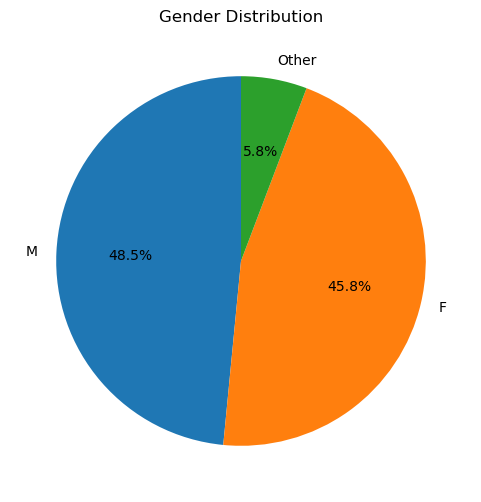

Men commit the most crimes in Los Angeles


In [71]:
#Pie Chart showing occuruence of crime based of gender

# Count the occurrences of each gender
gender_counts = clean_crime_data['Gender'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.ylabel('')  # Remove y-axis label
plt.show()
print("Men commit the most crimes in Los Angeles")

In [64]:
#changing random values in Ethnicity column to other.
clean_crime_data['Ethnicity'] = clean_crime_data['Ethnicity'].replace({
    'Other Asians': 'Asian',
    'Others' : 'Other',
    'K' : 'Other',
    'C': 'Other',
    'I': 'Other',
    'J': 'Other',
    'V': 'Other',
    'F': 'Other',
  'nan': 'Other',
   'G': 'Other',
    'U': 'Other',
     'P': 'Other',
      'S': 'Other',
       'Z': 'Other',
        'D': 'Other',
        'L' : 'Other',
    'X': 'Other'})
clean_crime_data

,Date of Crime,Time of Crime,Neighborhood,Type of Crime,Age,Gender,Ethnicity,Location,Weapon Used,Address,Latitude,Longitude
0,2020-01-08,22:30:00,Southwest,BATTERY - SIMPLE ASSAULT,36,F,Black,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,34.0141,-118.2978
1,2020-01-01,03:30:00,Central,BATTERY - SIMPLE ASSAULT,25,M,Hispanic,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,34.0459,-118.2545
5,2020-01-01,00:30:00,Central,"RAPE, FORCIBLE",25,F,Hispanic,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,700 S BROADWAY,34.0452,-118.2534
10,2020-01-04,22:00:00,Central,BURGLARY FROM VEHICLE,29,M,Asian,STREET,ROCK/THROWN OBJECT,15TH,34.0359,-118.2648
11,2020-01-05,09:55:00,Central,CRIMINAL THREATS - NO WEAPON DISPLAYED,35,M,Other,PARKING LOT,VERBAL THREAT,800 N ALAMEDA ST,34.0615,-118.2412
...,...,...,...,...,...,...,...,...,...,...,...,...
834303,2023-08-27,00:30:00,N Hollywood,BRANDISH WEAPON,38,M,Hispanic,STREET,KNIFE WITH BLADE 6INCHES OR LESS,11000 MCCORMICK ST,34.1660,-118.3705
834306,2023-07-24,14:00:00,Hollywood,ROBBERY,23,F,Black,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",5500 HOLLYWOOD BL,34.1038,-118.3151
834309,2023-09-20,19:15:00,Van Nuys,BATTERY - SIMPLE ASSAULT,44,M,Black,LIBRARY,UNKNOWN WEAPON/OTHER WEAPON,6200 SYLMAR AV,34.1837,-118.4465
834316,2023-03-22,10:00:00,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,Hispanic,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",12800 FILMORE ST,34.2790,-118.4116


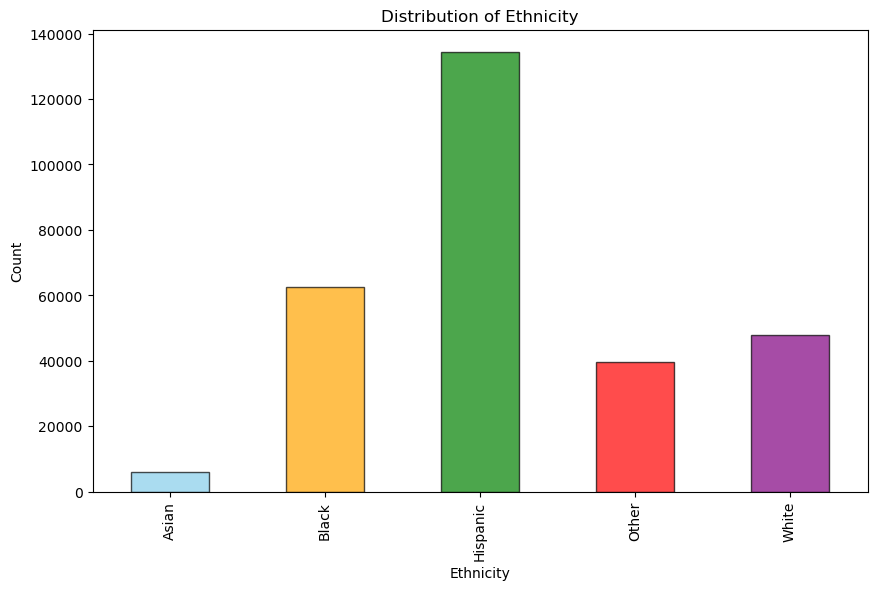

Hispanic Americans commit the most crimes in Los Angeles


In [72]:
# Get unique ethnicities and assign colors manually
unique_ethnicities = clean_crime_data['Ethnicity'].unique()
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown'][:len(unique_ethnicities)]

# Plot a bar chart for ethnicity with different colors
plt.figure(figsize=(10, 6))
clean_crime_data['Ethnicity'].value_counts().sort_index().plot(kind='bar', color=colors, edgecolor='black', alpha=0.7)

plt.title('Distribution of Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.show()
print("Hispanic Americans commit the most crimes in Los Angeles")

In [66]:
# Drop rows with specific age values
values_to_drop = [0,-1, -2]
Age= clean_crime_data[~clean_crime_data['Age'].isin(values_to_drop)]

# Display the filtered DataFrame
print(Age)

       Date of Crime Time of Crime Neighborhood  \
0         2020-01-08      22:30:00    Southwest   
1         2020-01-01      03:30:00      Central   
5         2020-01-01      00:30:00      Central   
10        2020-01-04      22:00:00      Central   
11        2020-01-05      09:55:00      Central   
...              ...           ...          ...   
834303    2023-08-27      00:30:00  N Hollywood   
834306    2023-07-24      14:00:00    Hollywood   
834309    2023-09-20      19:15:00     Van Nuys   
834316    2023-03-22      10:00:00     Foothill   
834317    2023-04-12      16:30:00  77th Street   

                                         Type of Crime  Age Gender Ethnicity  \
0                             BATTERY - SIMPLE ASSAULT   36      F     Black   
1                             BATTERY - SIMPLE ASSAULT   25      M  Hispanic   
5                                       RAPE, FORCIBLE   25      F  Hispanic   
10                               BURGLARY FROM VEHICLE   29      M 

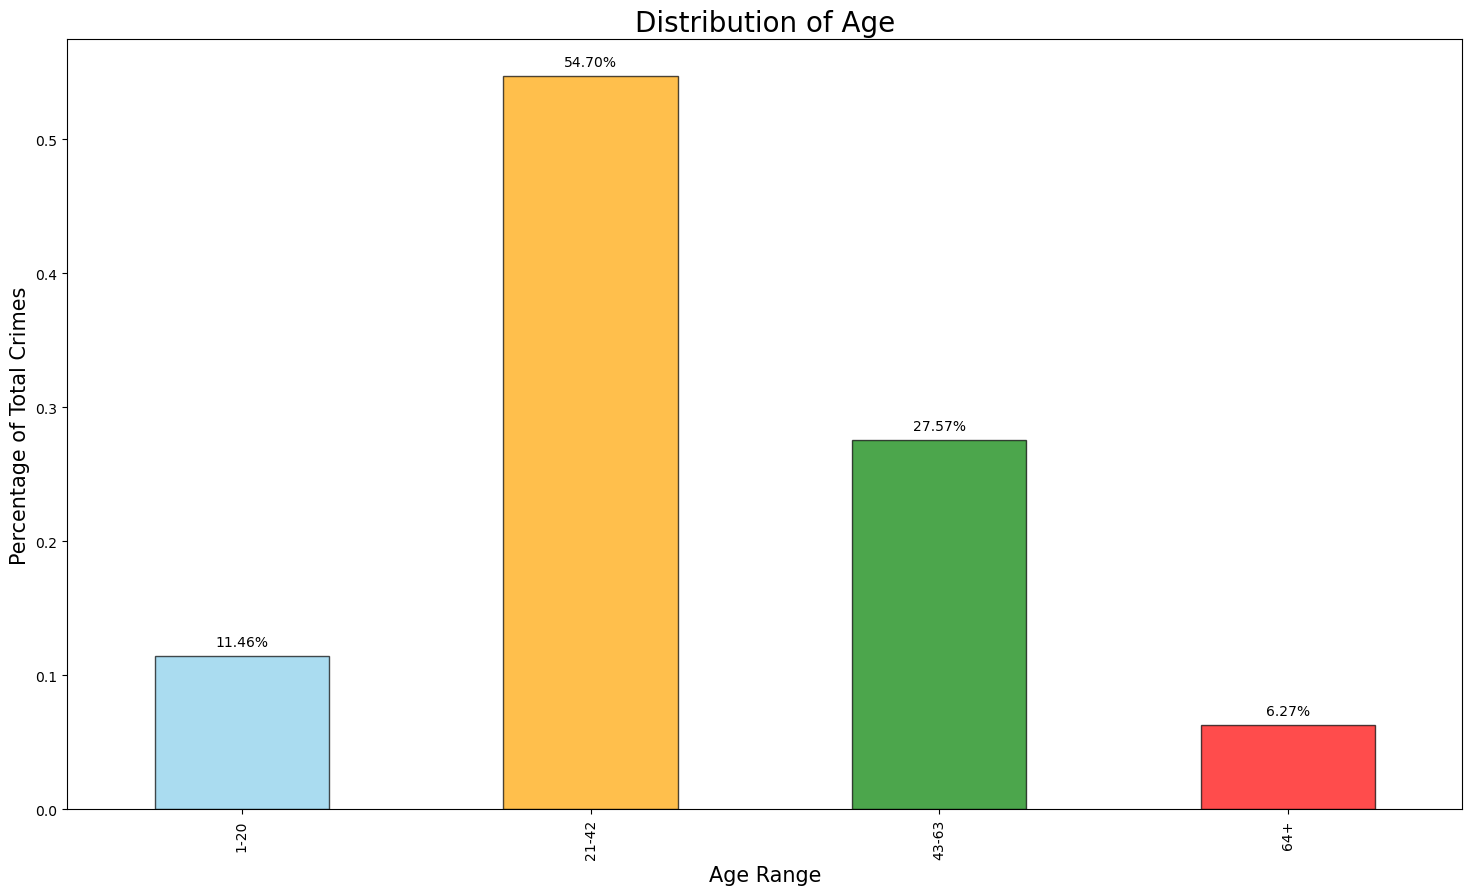

The average Age of Crime Committers: 34.49


In [76]:
#Histogram for Distribution of Age
# Define age ranges
bins = [1, 21, 43, 64, float('inf')]
labels = ['1-20', '21-42', '43-63', '64+']

# Create a new column 'Age Range' based on the bins
clean_crime_data['Age Range'] = pd.cut(clean_crime_data['Age'], bins=bins, labels=labels, right=False)

# Get unique age ranges and assign colors manually
unique_age_ranges = clean_crime_data['Age Range'].unique()
colors = ['skyblue', 'orange', 'green', 'red']

# Plot a bar chart for age ranges with different colors
plt.figure(figsize=(18, 10))
ax = clean_crime_data['Age Range'].value_counts(normalize=True).sort_index().plot(kind='bar', color=colors, edgecolor='black', alpha=0.7)

# Add percentage labels on top of each bar
for p in ax.patches:
    percentage = f'{p.get_height() * 100:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.title('Distribution of Age', fontsize=20)
plt.xlabel('Age Range', fontsize=15)
plt.ylabel('Percentage of Total Crimes', fontsize=15)
plt.show()
# Print the average age
average_age = clean_crime_data['Age'].mean()
print(f"The average Age of Crime Committers: {average_age:.2f}")
